In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../Dataset/yoxi去識別化數據(僅供本次賽事使用)_20220627/yoxi_2021H1.csv')
print(df.shape)
df.head()

(316278, 16)


,yoxi_0,yoxi_1,yoxi_2,yoxi_3,yoxi_4,yoxi_5,yoxi_6,yoxi_7,yoxi_8,yoxi_9,yoxi_10,yoxi_11,yoxi_12,yoxi_13,yoxi_14,yoxi_15
0,60776,34,13204,0,0,POINT (121.5555267 25.0532422),POINT (121.5679253 25.0412553),0,0,0,1,2021-02-17 10:45:39.000,2021-02-17 10:49:04.243,0,[],0
1,60779,34,13204,0,0,POINT (121.5555267 25.0532422),POINT (121.567925 25.041262),0,0,0,0,2021-02-17 10:49:13.000,2021-02-17 10:50:00.540,0,[],0
2,61734,34,4380,2021-02-18 08:22:38.547,2021-02-18 08:27:41.360,POINT (121.54587060213089 25.058407217787671),POINT (121.52883924543858 25.05149683235264),5,2516,0,0,2021-02-18 08:19:44.000,0,0,[2],101-150
3,61775,34,10676,2021-02-18 09:14:10.177,2021-02-18 09:36:49.937,POINT (121.61086957901716 25.059357414355343),POINT (121.5128955245018 25.044088092025909),22,13927,0,0,2021-02-18 09:07:25.000,0,0,[],301-400
4,62030,34,5526,2021-02-18 12:32:07.573,2021-02-18 12:47:54.953,POINT (121.56557478010654 25.034527597856808),POINT (121.540168 25.0671179),15,6327,0,0,2021-02-18 12:23:48.000,0,0,[],201-250


In [6]:
df['yoxi_2'].value_counts()

5161     305
517      293
2619     281
9244     279
923      263
        ... 
2214       1
852        1
25282      1
2515       1
26024      1
Name: yoxi_2, Length: 27452, dtype: int64

In [17]:
df['yoxi_2'].value_counts()>10

5161      True
517       True
2619      True
9244      True
923       True
         ...  
2214     False
852      False
25282    False
2515     False
26024    False
Name: yoxi_2, Length: 27452, dtype: bool

In [27]:
df = df[(df['yoxi_10'].isin([0])) & (df['yoxi_9'].isin([0]))]
df.shape

(284283, 16)

In [28]:
df = df[df['yoxi_15'] != '0']
df.shape

(283156, 16)

In [35]:
df['yoxi_15'].value_counts()

101-150    80259
151-200    56721
1-100      55394
201-250    39371
251-300    23188
301-400    19794
401-500     5253
500-        3169
Name: yoxi_15, dtype: int64

In [48]:
df['yoxi_11'].sort_values()

39169     2021-01-01 00:00:09.000
251220    2021-01-01 00:02:49.000
265880    2021-01-01 00:06:16.000
141304    2021-01-01 00:06:28.000
17505     2021-01-01 00:08:16.000
                   ...           
315015    2021-06-30 23:59:00.860
158719    2021-06-30 23:59:08.053
79929     2021-06-30 23:59:38.963
210678    2021-06-30 23:59:39.163
115567    2021-06-30 23:59:41.390
Name: yoxi_11, Length: 283156, dtype: object

In [43]:
count_list = df['yoxi_15'].value_counts()
money_list = [125, 175, 50, 225, 275, 350, 450, 600]
total_money = 0

for i in range(len(money_list)):
    print(money_list[i]*count_list[i])
    total_money = total_money + money_list[i]*count_list[i]

print(total_money/ len(df))

10032375
9926175
2769700
8858475
6376700
6927900
2363850
1901400
173.60244882679513


In [43]:
df['yoxi_5'][0][0]

'P'

Data Cleaning

In [3]:
#df.isna().sum()

df = df.dropna()
df = df[(df['yoxi_10'].isin([0, 1])) & (df['yoxi_9'].isin([0, 1]))]
print(df.shape)

(314189, 16)


Data Analysis

<AxesSubplot: >

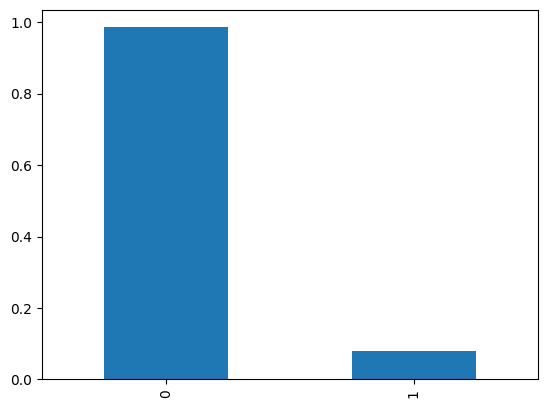

In [49]:
df.yoxi_9.value_counts(normalize= True).plot(kind='bar')
df.yoxi_9.value_counts(normalize= True)


0    0.91916
1    0.08084
Name: yoxi_10, dtype: float64

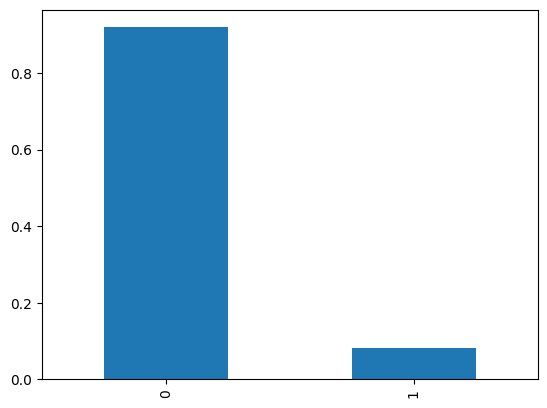

In [48]:
df.yoxi_10.value_counts(normalize= True).plot(kind='bar')
df.yoxi_10.value_counts(normalize= True)

#乘客取消訂單的比例較司機高

In [66]:
df['yoxi_9'].value_counts()

0    309649
1      4540
Name: yoxi_9, dtype: int64

<AxesSubplot: title={'center': 'Order Cancelled'}>

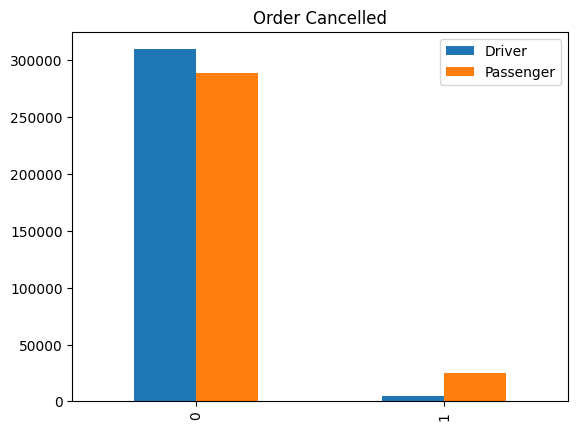

In [85]:
y9 = list(df['yoxi_9'].value_counts())
y10 = list(df['yoxi_10'].value_counts())

df_cancel = pd.DataFrame({'Driver':y9, 'Passenger':y10}) 
df_cancel.plot(kind = 'bar', title ='Order Cancelled')


In [5]:
df

,yoxi_0,yoxi_1,yoxi_2,yoxi_3,yoxi_4,yoxi_5,yoxi_6,yoxi_7,yoxi_8,yoxi_9,yoxi_10,yoxi_11,yoxi_12,yoxi_13,yoxi_14,yoxi_15
0,60776,34,13204,0,0,POINT (121.5555267 25.0532422),POINT (121.5679253 25.0412553),0,0,0,1,2021-02-17 10:45:39.000,2021-02-17 10:49:04.243,0,[],0
1,60779,34,13204,0,0,POINT (121.5555267 25.0532422),POINT (121.567925 25.041262),0,0,0,0,2021-02-17 10:49:13.000,2021-02-17 10:50:00.540,0,[],0
2,61734,34,4380,2021-02-18 08:22:38.547,2021-02-18 08:27:41.360,POINT (121.54587060213089 25.058407217787671),POINT (121.52883924543858 25.05149683235264),5,2516,0,0,2021-02-18 08:19:44.000,0,0,[2],101-150
3,61775,34,10676,2021-02-18 09:14:10.177,2021-02-18 09:36:49.937,POINT (121.61086957901716 25.059357414355343),POINT (121.5128955245018 25.044088092025909),22,13927,0,0,2021-02-18 09:07:25.000,0,0,[],301-400
4,62030,34,5526,2021-02-18 12:32:07.573,2021-02-18 12:47:54.953,POINT (121.56557478010654 25.034527597856808),POINT (121.540168 25.0671179),15,6327,0,0,2021-02-18 12:23:48.000,0,0,[],201-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316273,90730,67,9575,2021-03-10 01:36:05.397,2021-03-10 01:56:42.333,POINT (121.5448205 25.061915),POINT (121.6118825 25.0584861),20,8245,0,0,2021-03-10 01:32:29.000,0,0,[],251-300
316274,91538,67,10345,2021-03-10 11:22:18.293,2021-03-10 11:26:32.483,POINT (121.5019237 25.1263822),POINT (121.5135318 25.1275439),4,1523,0,0,2021-03-10 11:18:03.000,0,0,[1],1-100
316275,91755,67,3885,2021-03-10 13:45:06.417,2021-03-10 13:46:38.413,POINT (121.55313670635223 25.024633846081294),POINT (121.55666381120682 25.028076258462356),1,529,0,0,2021-03-10 13:36:34.000,0,0,[],1-100
316276,91770,67,90,2021-03-10 13:58:43.107,2021-03-10 14:05:32.573,POINT (121.553657 25.036954),POINT (121.54493182897568 25.03404715202533),6,1741,0,0,2021-03-10 13:47:50.000,0,0,[2],1-100


[]       0.608879
[2]      0.269736
[1,2]    0.101935
[1]      0.019323
[2,1]    0.000127
Name: yoxi_14, dtype: float64

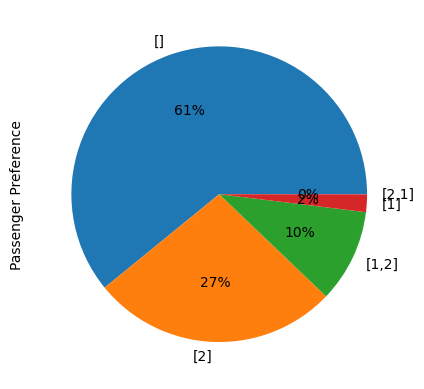

In [92]:
df.yoxi_14.value_counts(normalize= True).plot(kind='pie', label = 'Passenger Preference', autopct='%1.0f%%')
df.yoxi_14.value_counts(normalize= True)

#df[df.yoxi_15 == '0'] 使用優惠券？？

In [ ]:
df.loc[df['yoxi'] == 83239381]

In [5]:
df['yoxi_2'].value_counts()

5161     305
517      293
2619     281
9244     279
923      263
        ... 
2214       1
852        1
25282      1
2515       1
26024      1
Name: yoxi_2, Length: 27452, dtype: int64

In [6]:
df['yoxi_1'].value_counts()

92      1385
466     1359
669     1157
424     1094
237     1092
        ... 
1182       1
1485       1
1082       1
994        1
1814       1
Name: yoxi_1, Length: 1816, dtype: int64